#Introdução

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png"/>
<img src="https://s3.amazonaws.com/codecademy-content/programs/machine-learning/svm/two_dimensions.png" width="360" height="360"/> <

K-NN:


1.  Não paramétrico. (Não assume nada quanto a distribuição dos dados) 
2.  Tamanho das amostras moderadas.
3.  Colinearidade e outliers devem ser tratados antes do treinamento
4. (Têndencia) Se sobressai em relação ao SVM quando existe uma maior quantidade de dados de treino em relação a quantidade de atributos
5. k-NN pode encontrar padrões altamente complexos mas é mais desafiador sua interpretação em relação ao SVM
6.  Maiores valores de K, e os mesmos sendo ímpares tender a gerar um modelo melhor, evitando overfit

SVM:

1.  Paramétrico (Assume que os dados são distribuidos de acordo com seu Kernel) 
2.  SVM mais robusto em relação aos outliers.
3.  SVM demanda menos computacionalmente que o k-NN
4.  SVM é mais fácil de interpretar, porém é mais limitado em relação aos padrões que pode encontrar
5. (Têndencia) Se sobressai em relação ao K-NN quando existe uma maior quantidade de atributos em relação a quantidade de dados de treino



#Importando bibliotecas, lendo dataset, separando dados de teste e treino:

In [ ]:
# Imports
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing
from sklearn.metrics import plot_confusion_matrix, classification_report, mean_squared_error
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px

Primeiro vamos  ler o dataset, os dados são de tal forma que são mostrada várias questões em relação a riscos, competitivdade e questões financeiras, e por fim classifica se ocorreu ou não falência. 

In [ ]:
#Lendo dataset
df = pd.read_csv("Qualitative_Bankruptcy.csv", names=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness', 'Operating Risk', 'Class'])
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [192]:
fig = px.bar(df, y='Class', x='Industrial Risk', text='Class', title='Classes a partir do risco industrial')
fig.show()

In [193]:
fig = px.bar(df, y='Class', x='Management Risk', text='Class', title='Classes a partir do risco de gerenciamento')
fig.show()

In [194]:
fig = px.bar(df, y='Class', x='Financial Flexibility', text='Class', title='Classes a partir da flexibilidade financeira')
fig.show()

In [195]:
fig = px.bar(df, y='Class', x='Credibility', text='Class', title='Classes a partir da credibilidade')
fig.show()

In [196]:
fig = px.bar(df, y='Class', x='Competitiveness', text='Class', title='Classes a partir da competividade')
fig.show()

In [197]:
fig = px.bar(df, y='Class', x='Operating Risk', text='Class', title='Classes a partir dos riscos operacionais')
fig.show()

In [ ]:
df["Industrial Risk"]=preprocessing.LabelEncoder().fit_transform(df["Industrial Risk"])
df["Management Risk"]=preprocessing.LabelEncoder().fit_transform(df["Management Risk"])
df["Financial Flexibility"]=preprocessing.LabelEncoder().fit_transform(df["Financial Flexibility"])
df["Credibility"]=preprocessing.LabelEncoder().fit_transform(df["Credibility"])
df["Competitiveness"]=preprocessing.LabelEncoder().fit_transform(df["Competitiveness"])
df["Operating Risk"]=preprocessing.LabelEncoder().fit_transform(df["Operating Risk"])
df["Class"]=preprocessing.LabelEncoder().fit_transform(df["Class"])

df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


Agora vamos separar os dados

In [ ]:
#Vamos separar os dados entre a variável dependente e independente
x = df.drop(['Class'], axis=1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
x.head()

(187, 6) (187,) (63, 6) (63,)


,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


#K-NN

Vamos primeiro aplicar alguns métodos para encontrar o K ótimo:   
1. Gráfico de erro ao quadrado pelo k (dist**2 versus k)
2. Gráfico de exatidão (acurácia) versus k

Text(0, 0.5, 'Dist**2')

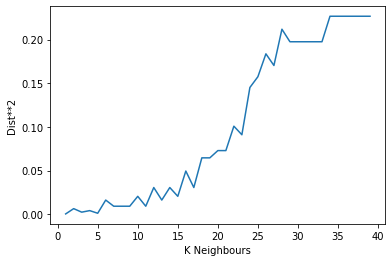

In [ ]:
#função para o gráfico de cotovelo
def Elbow(k):
    test_score = []
    
    for i in k:
        reg = KNeighborsClassifier(n_neighbors = i)
        reg.fit(x_train, y_train)
        tmp = reg.predict(x_test)
        tmp = mean_squared_error(tmp, y_test)
        test_score.append(tmp**2)
    
    return test_score

#gerando gráfico utilizando de k=1 até k=40
k = range(1, 40)
test = Elbow(k)

plt.plot(k,test)
plt.xlabel("K Neighbours")
plt.ylabel("Dist**2")

In [ ]:
#k ótimo
min = np.min(test)
#print(min)
for item in test:
  #print(round(item, 2))
  if round(item, 2)==min:
    kOtimo = k[test.index(item)]

print("k ótimo: ", kOtimo)

k ótimo:  8


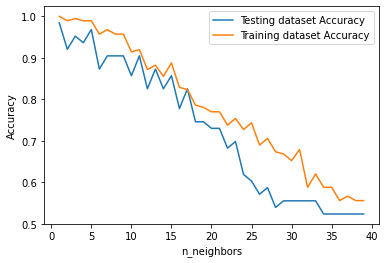

In [ ]:
neighbors = np.arange(1, 40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=kOtimo)
 
knn.fit(x_train, y_train)
 
# Predict on dataset which model has not seen before
predictions = knn.predict(x_test)
print(predictions-y_test.values)

[-1  0  0  0  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        31
           1       1.00      0.81      0.90        32

    accuracy                           0.90        63
   macro avg       0.92      0.91      0.90        63
weighted avg       0.92      0.90      0.90        63



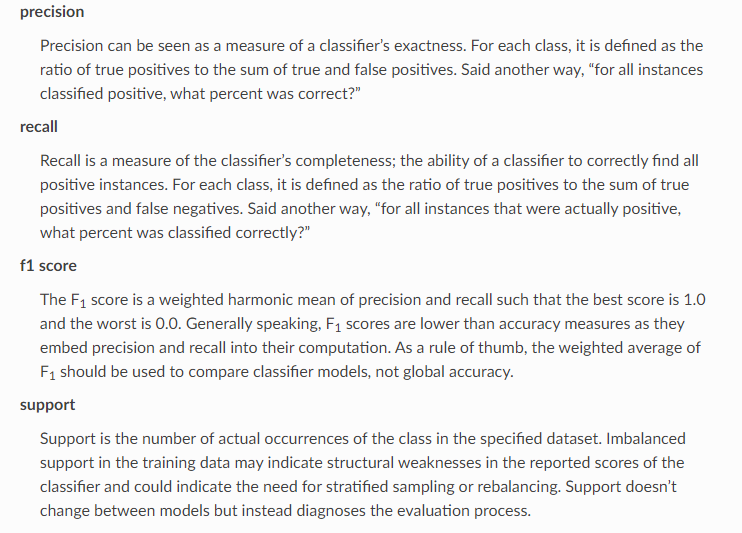

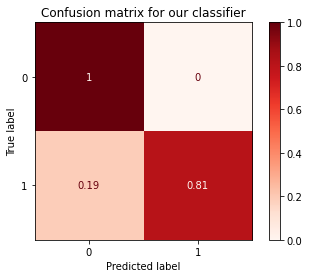

In [ ]:
matrix = plot_confusion_matrix(knn, x_test, y_test,
                                 cmap=plt.cm.Reds,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)

# SVM


Criando SVM com Kernel apropriado, e treinando o modelo do SVM

In [ ]:
#criando classificador com kernel polinomial, foi o que apresentou menos erro para o conjunto de dados
clf = svm.SVC(kernel='poly')

#Encontrando o modelo ajustado aos daods
clf = clf.fit(x_train, y_train)

Fazendo predição dos dados:

In [ ]:
#Predizendo
predictions = clf.predict(x_test)

#Printando a diferença entre o dado predito e os dados de teste, caso dê 0 significa que foi correta a predição, caso dê 1 ou -1 significa que foi errada a predição
print(predictions-y_test.values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.97      1.00      0.98        32

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



Gerando a matriz de confusão: 

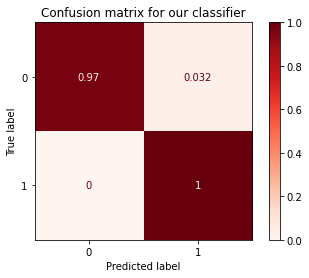

In [ ]:
#gerando matriz e plotando
matrix = plot_confusion_matrix(clf, x_test, y_test,
                                 cmap=plt.cm.Reds,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)

#Conclusão

Em relação ao nosso dataset podemos ver que não encontramos grandes diferenças entre ambos os métodos, mas é possível notar que o SVM se sobressaiu, apesar de ambos apresentarem resultados aceitáveis, mas isso não é regra geral e pode mudar dependendo dos dados trabalhados, e também das questões levantadas no começo

#Referências

https://hal.archives-ouvertes.fr/hal-01657491/document

https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html
